# **Titanic Dataset - Logistic Regression**  # 

# 1. Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, GridSearchCV , train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/test-file/tested.csv


# 2. Loading Dataset

In [2]:
df = pd.read_csv("/kaggle/input/test-file/tested.csv")
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


# 3. EDA

In [3]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [5]:
df['Sex'].value_counts()

Sex
male      266
female    152
Name: count, dtype: int64

In [6]:
df['Pclass'].value_counts()

Pclass
3    218
1    107
2     93
Name: count, dtype: int64

In [7]:
df['Embarked'].value_counts()

Embarked
S    270
C    102
Q     46
Name: count, dtype: int64

In [8]:
df.shape

(418, 12)

In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [10]:
print("✅ Missing values:\n", df.isnull().sum())
print("\n✅ Data types:\n", df.dtypes)
print("\n✅ Preview:\n", df.head())

✅ Missing values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

✅ Data types:
 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

✅ Preview:
    PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs

# 4. Data Cleaning / ETL

In [11]:
df = df.drop(columns=['PassengerId','Name','Ticket','Cabin'])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S


In [12]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Fare'] = df['Fare'].fillna(df['Fare'].median())

In [13]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [14]:
df['Sex'] = df['Sex'].astype('category')
df['Embarked'] = df['Embarked'].astype('category')
df['Pclass'] = df['Pclass'].astype('category')
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,0,3,male,27.0,0,0,8.0500,S
414,1,1,female,39.0,0,0,108.9000,C
415,0,3,male,38.5,0,0,7.2500,S
416,0,3,male,27.0,0,0,8.0500,S


In [15]:
print("✅ Missing values:\n", df.isnull().sum())
print("\n✅ Data types:\n", df.dtypes)
print("\n✅ Preview:\n", df.head())

✅ Missing values:
 Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

✅ Data types:
 Survived       int64
Pclass      category
Sex         category
Age          float64
SibSp          int64
Parch          int64
Fare         float64
Embarked    category
dtype: object

✅ Preview:
    Survived Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0      3    male  34.5      0      0   7.8292        Q
1         1      3  female  47.0      1      0   7.0000        S
2         0      2    male  62.0      0      0   9.6875        Q
3         0      3    male  27.0      0      0   8.6625        S
4         1      3  female  22.0      1      1  12.2875        S


In [16]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 1, 'Q': 2, 'C': 3})

In [17]:
scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

In [18]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,0.386231,0,0,-0.497413,2
1,1,3,1,1.371370,1,0,-0.512278,1
2,0,2,0,2.553537,0,0,-0.464100,2
3,0,3,0,-0.204852,0,0,-0.482475,1
4,1,3,1,-0.598908,1,1,-0.417492,1
...,...,...,...,...,...,...,...,...
413,0,3,0,-0.204852,0,0,-0.493455,1
414,1,1,1,0.740881,0,0,1.314435,3
415,0,3,0,0.701476,0,0,-0.507796,1
416,0,3,0,-0.204852,0,0,-0.493455,1


# 5. Deep EDA

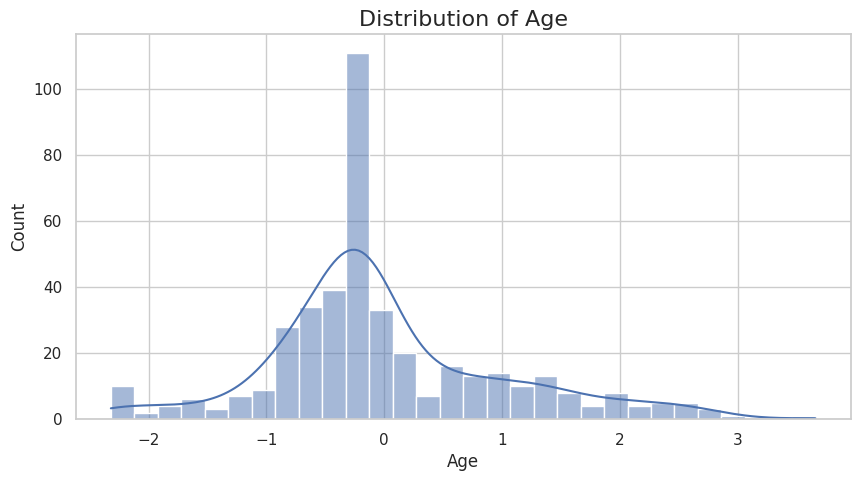

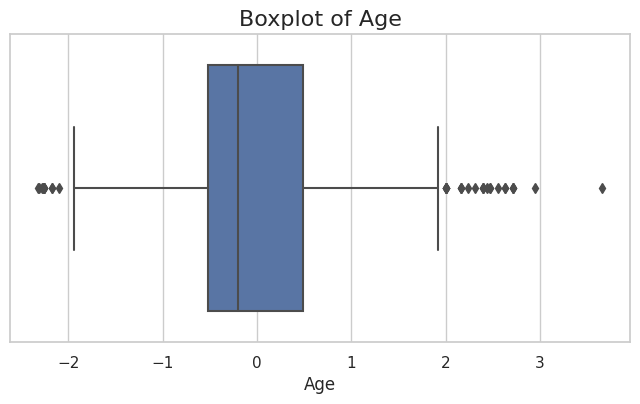

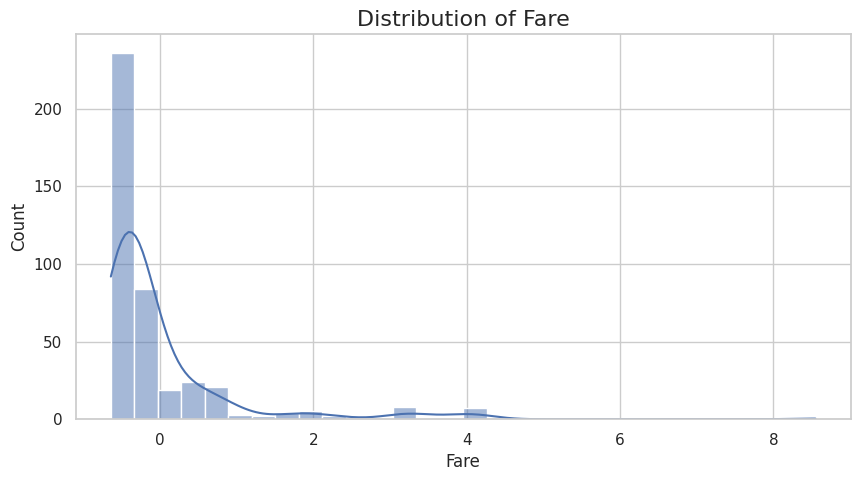

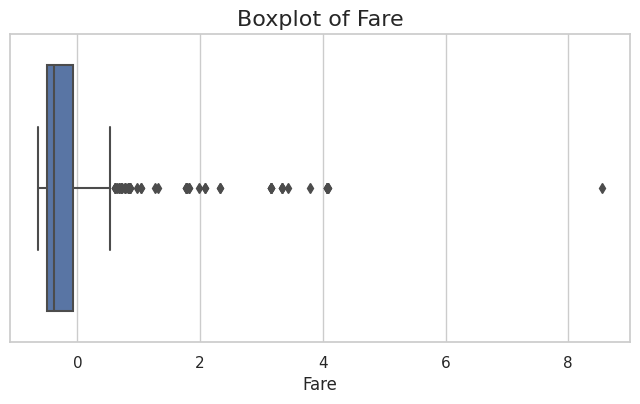

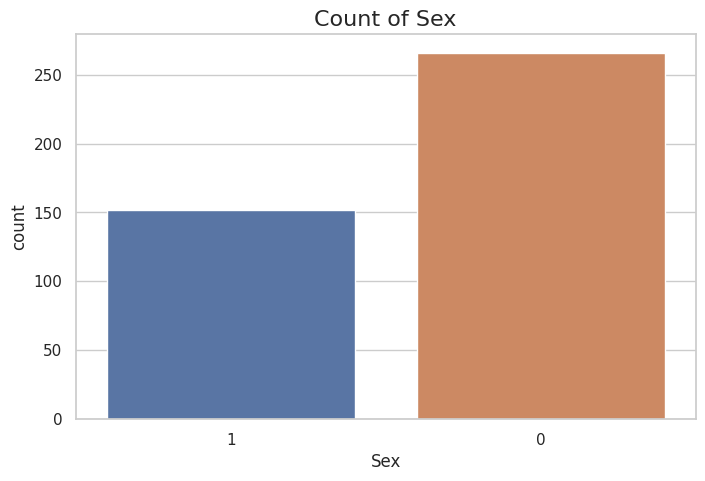

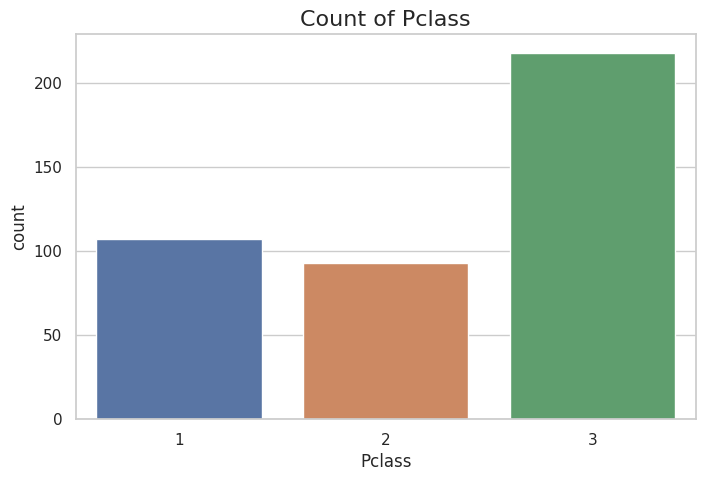

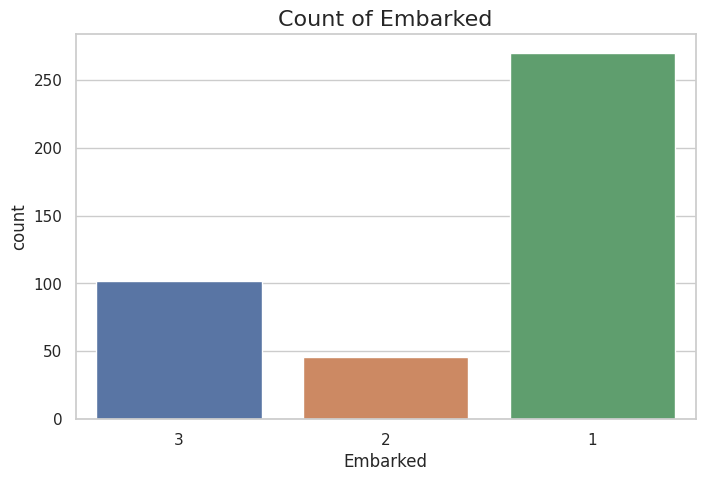

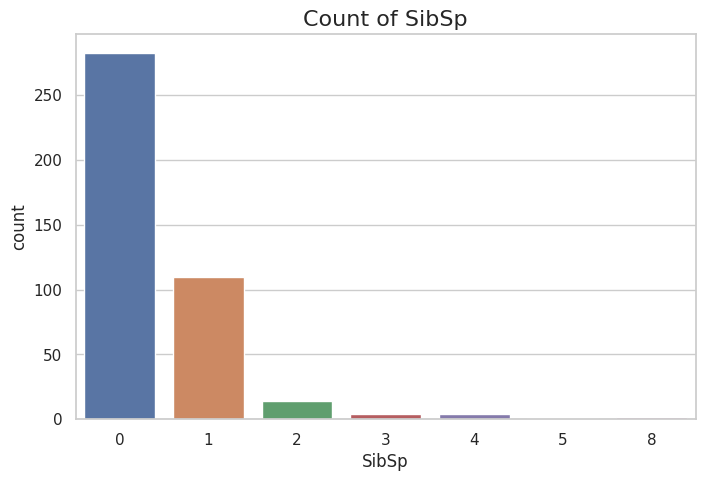

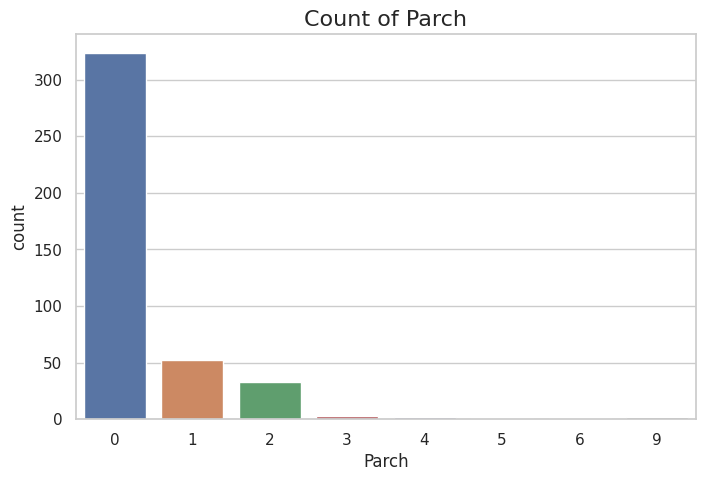

In [19]:

#--------------------Univariate Plots-----------------------


# Set style
sns.set(style="whitegrid")

# -------------------
# Numerical Features
# -------------------
num_features = ["Age", "Fare"]

for col in num_features:
    plt.figure(figsize=(10,5))
    sns.histplot(df[col].dropna(), kde=True, bins=30)
    plt.title(f"Distribution of {col}", fontsize=16)
    plt.show()

    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}", fontsize=16)
    plt.show()

# -------------------
# Categorical Features
# -------------------
cat_features = ["Sex", "Pclass", "Embarked", "SibSp", "Parch"]

for col in cat_features:
    plt.figure(figsize=(8,5))
    sns.countplot(x=df[col])
    plt.title(f"Count of {col}", fontsize=16)
    plt.show()


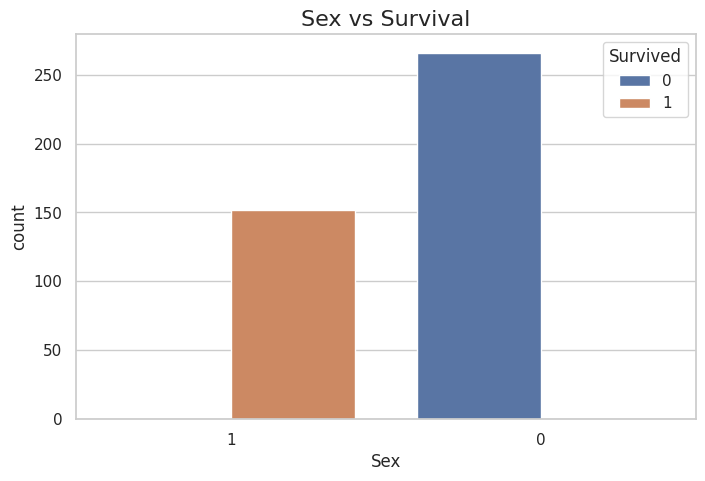


Survival rate by Sex:
 Sex
1    1.0
0    0.0
Name: Survived, dtype: float64


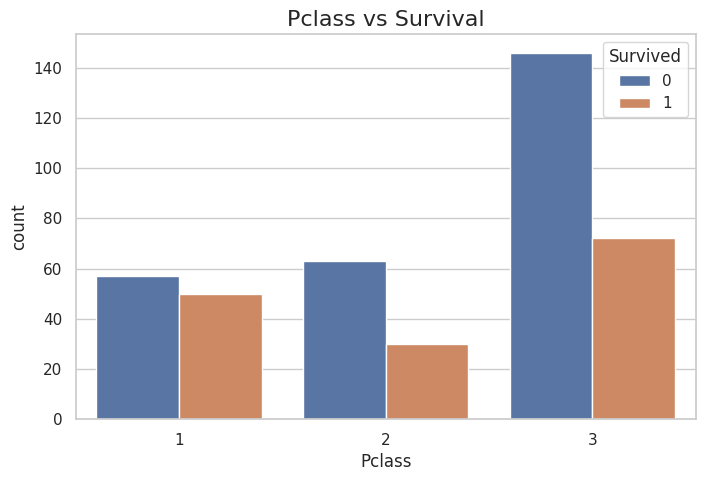


Survival rate by Pclass:
 Pclass
1    0.467290
2    0.322581
3    0.330275
Name: Survived, dtype: float64


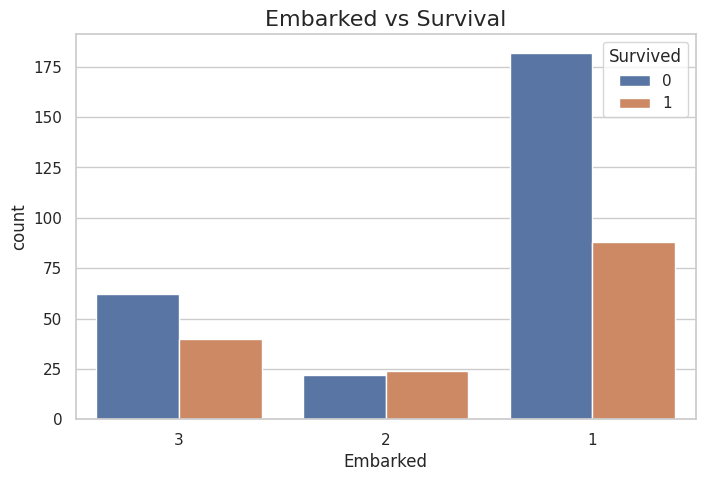


Survival rate by Embarked:
 Embarked
3    0.392157
2    0.521739
1    0.325926
Name: Survived, dtype: float64


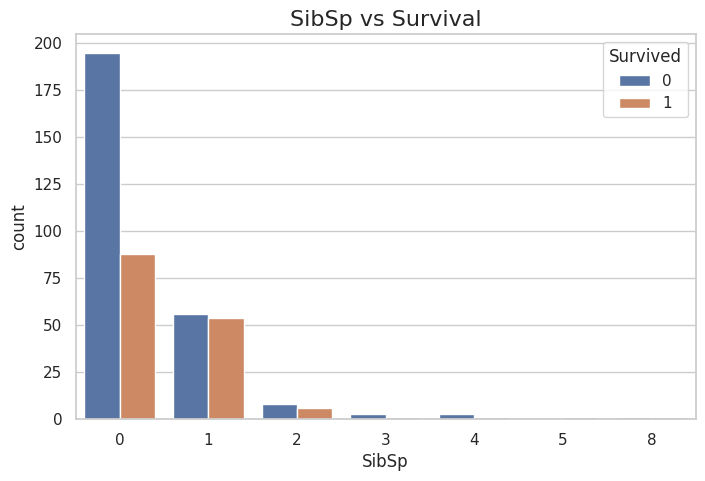


Survival rate by SibSp:
 SibSp
0    0.310954
1    0.490909
2    0.428571
3    0.250000
4    0.250000
5    1.000000
8    0.500000
Name: Survived, dtype: float64


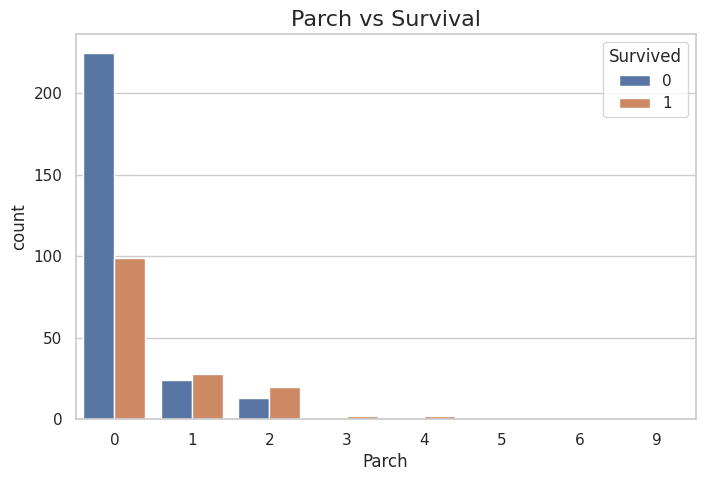


Survival rate by Parch:
 Parch
0    0.305556
1    0.538462
2    0.606061
3    0.666667
4    1.000000
5    0.000000
6    0.000000
9    0.500000
Name: Survived, dtype: float64


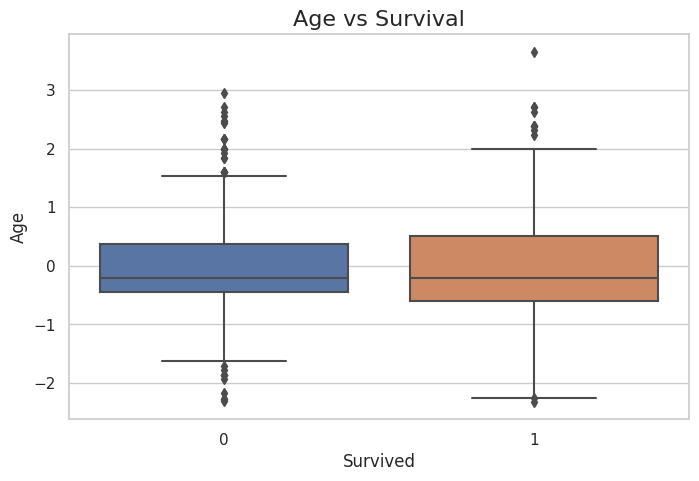

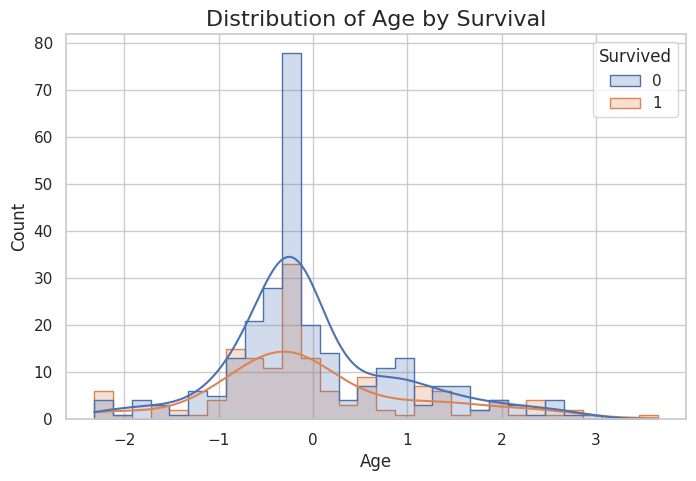

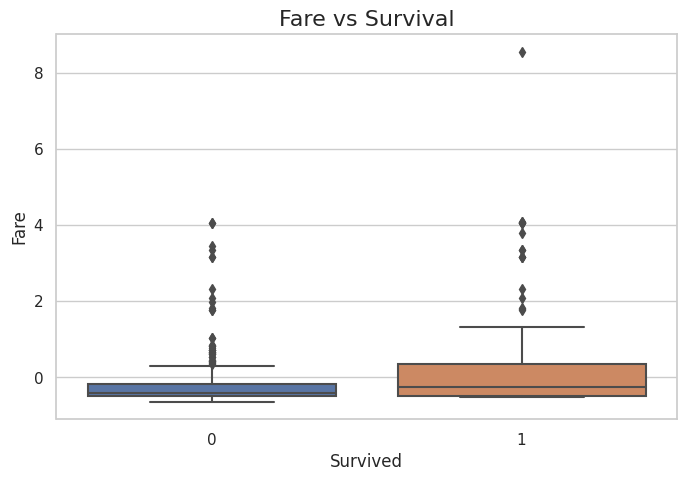

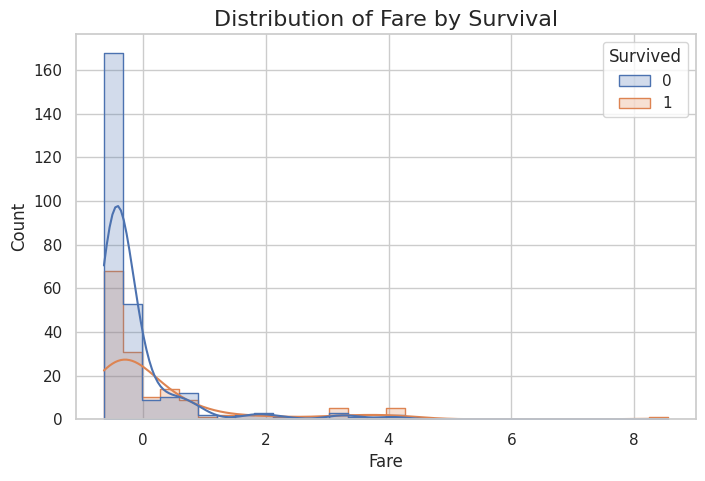

In [20]:

#--------------------Bivariate Plots------------------------


# -------------------
# Categorical vs Target
# -------------------
cat_features = ["Sex", "Pclass", "Embarked", "SibSp", "Parch"]

for col in cat_features:
    plt.figure(figsize=(8,5))
    sns.countplot(x=col, hue="Survived", data=df)
    plt.title(f"{col} vs Survival", fontsize=16)
    plt.show()

    survival_rate = df.groupby(col)["Survived"].mean()
    print(f"\nSurvival rate by {col}:\n", survival_rate)

# -------------------
# Numerical vs Target
# -------------------
num_features = ["Age", "Fare"]

for col in num_features:
    plt.figure(figsize=(8,5))
    sns.boxplot(x="Survived", y=col, data=df)
    plt.title(f"{col} vs Survival", fontsize=16)
    plt.show()

    plt.figure(figsize=(8,5))
    sns.histplot(data=df, x=col, hue="Survived", kde=True, element="step", bins=30)
    plt.title(f"Distribution of {col} by Survival", fontsize=16)
    plt.show()


# Feature Engineering

In [21]:
# Fare bands
df["FareBand"] = pd.qcut(df["Fare"], 4, labels=["Low", "Mid", "High", "VeryHigh"])

df["FareBand"] = pd.qcut(df["Fare"], 4, labels=False)  # Will assign 0,1,2,3

In [22]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FareBand
0,0,3,0,0.386231,0,0,-0.497413,2,0
1,1,3,1,1.371370,1,0,-0.512278,1,0
2,0,2,0,2.553537,0,0,-0.464100,2,1
3,0,3,0,-0.204852,0,0,-0.482475,1,1
4,1,3,1,-0.598908,1,1,-0.417492,1,1
...,...,...,...,...,...,...,...,...,...
413,0,3,0,-0.204852,0,0,-0.493455,1,1
414,1,1,1,0.740881,0,0,1.314435,3,3
415,0,3,0,0.701476,0,0,-0.507796,1,0
416,0,3,0,-0.204852,0,0,-0.493455,1,1


# Train Test Split

In [23]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


# Split dataset
X = df.drop("Survived", axis=1)
y = df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Standard scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Important: transform, not fit_transform

# Stratified K-Fold setup
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

param_grid = {
    "C": [0.01, 0.1, 1, 10],       
    "penalty": ["l1", "l2"],            
    "solver": ["liblinear", "saga"]     
}

model = LogisticRegression(max_iter=1000)

grid = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=skf,                
    scoring="accuracy",    
    n_jobs=-1              
)

grid.fit(X_train_scaled, y_train)

print("Best parameters found:", grid.best_params_)
print("Best cross-validation accuracy:", grid.best_score_)

best_model = LogisticRegression(
    max_iter=1000,
    C=grid.best_params_["C"],
    penalty=grid.best_params_["penalty"],
    solver=grid.best_params_["solver"]
)

best_model.fit(X_train_scaled, y_train)

# Now you have X_test_scaled and y_test to evaluate on
y_pred = best_model.predict(X_test_scaled)
y_prob = best_model.predict_proba(X_test_scaled)[:, 1]



Best parameters found: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
Best cross-validation accuracy: 1.0


# Confusion Matrix and AUC , ROC

In [24]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC Score:", roc_auc)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        31

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84

Confusion Matrix:
[[53  0]
 [ 0 31]]
ROC-AUC Score: 1.0
